In [2]:
from pathlib import Path # to interact with file system.


import statsmodels.formula.api as sm
import matplotlib.pylab as plt
import seaborn as sns # Making statistical graphs on top of what matplot can do 
import dmba
from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score
import numpy as np # for working with arrays.
import pandas as pd # for working with data frames (tables).
import matplotlib as mpl
from sklearn.model_selection import train_test_split # for data partition.
from sklearn.metrics import r2_score # to identify r_squared for regression model.
from sklearn.linear_model import LinearRegression # for linear regression model.
import os
import calendar
from pathlib import Path # to interact with file system.
import networkx as nx
from pandas.plotting import scatter_matrix, parallel_coordinates
import seaborn as sns # Making statistical graphs on top of what matplot can do 
from sklearn import preprocessing
import matplotlib.pylab as plt # %matplotlib inline renders the figure in a notebook

%matplotlib inline



In [3]:
pip install dmba

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
#Create a data frame in Python using carvana.csv file.
import os
print(os.listdir()) 
os.chdir('C:/Users/priya/OneDrive/Desktop/Spring 23/BAN 620 Data Mining/Case Assignments/Case 1')
car_df = pd.read_csv('Carvana_Case1.csv')

['Airfares(1).csv', 'Airfarestry.csv', 'Airfares_Case1.csv', 'Assignment_part2.ipynb', 'carvana.csv', 'Carvana_Case1.csv', 'DM ASSIGNMENT1.docx', 'SSRN-id3614450.pdf', 'Team1_Case1_BAN 620.docx', 'Team1_Case1_BAN 620_Updated.docx']


In [123]:
car_df.shape

(72983, 33)

In [124]:
car_df.columns #helpful in regression

Index(['RefId', 'IsBadBuy', 'Auction', 'VehYear', 'VehicleAge', 'Make',
       'Model', 'Trim', 'SubModel', 'Color', 'Transmission', 'WheelTypeID',
       'WheelType', 'VehOdo', 'Nationality', 'Size', 'TopThreeAmericanName',
       'MMRAcquisitionAuctionAveragePrice', 'MMRAcquisitionAuctionCleanPrice',
       'MMRAcquisitionRetailAveragePrice', 'MMRAcquisitonRetailCleanPrice',
       'MMRCurrentAuctionAveragePrice', 'MMRCurrentAuctionCleanPrice',
       'MMRCurrentRetailAveragePrice', 'MMRCurrentRetailCleanPrice',
       'PRIMEUNIT', 'AUCGUART', 'BYRNO', 'VNZIP1', 'VNST', 'VehBCost',
       'IsOnlineSale', 'WarrantyCost'],
      dtype='object')

In [125]:
print(car_df.dtypes)

RefId                                  int64
IsBadBuy                               int64
Auction                               object
VehYear                                int64
VehicleAge                             int64
Make                                  object
Model                                 object
Trim                                  object
SubModel                              object
Color                                 object
Transmission                          object
WheelTypeID                          float64
WheelType                             object
VehOdo                                 int64
Nationality                           object
Size                                  object
TopThreeAmericanName                  object
MMRAcquisitionAuctionAveragePrice    float64
MMRAcquisitionAuctionCleanPrice      float64
MMRAcquisitionRetailAveragePrice     float64
MMRAcquisitonRetailCleanPrice        float64
MMRCurrentAuctionAveragePrice        float64
MMRCurrent

In [126]:
car_df.head()

,RefId,IsBadBuy,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,...,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,1,0,ADESA,2006,3,MAZDA,MAZDA3,i,4D SEDAN I,RED,...,11597.0,12409.0,NaN,NaN,21973,33619,FL,7100.0,0,1113
1,2,0,ADESA,2004,5,DODGE,1500 RAM PICKUP 2WD,ST,QUAD CAB 4.7L SLT,WHITE,...,11374.0,12791.0,NaN,NaN,19638,33619,FL,7600.0,0,1053
2,3,0,ADESA,2005,4,DODGE,STRATUS V6,SXT,4D SEDAN SXT FFV,MAROON,...,7146.0,8702.0,NaN,NaN,19638,33619,FL,4900.0,0,1389
3,4,0,ADESA,2004,5,DODGE,NEON,SXT,4D SEDAN,SILVER,...,4375.0,5518.0,NaN,NaN,19638,33619,FL,4100.0,0,630
4,5,0,ADESA,2005,4,FORD,FOCUS,ZX3,2D COUPE ZX3,SILVER,...,6739.0,7911.0,NaN,NaN,19638,33619,FL,4000.0,0,1020


In [127]:
# Display the last five rows of the dataframe.
car_df.tail()

,RefId,IsBadBuy,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,...,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
72978,73010,1,ADESA,2001,8,MERCURY,SABLE,GS,4D SEDAN GS,BLACK,...,4836.0,5937.0,NaN,NaN,18111,30212,GA,4200.0,0,993
72979,73011,0,ADESA,2007,2,CHEVROLET,MALIBU 4C,LS,4D SEDAN LS,SILVER,...,10151.0,11652.0,NaN,NaN,18881,30212,GA,6200.0,0,1038
72980,73012,0,ADESA,2005,4,JEEP,GRAND CHEROKEE 2WD V,Lar,4D WAGON LAREDO,SILVER,...,11831.0,14402.0,NaN,NaN,18111,30212,GA,8200.0,0,1893
72981,73013,0,ADESA,2006,3,CHEVROLET,IMPALA,LS,4D SEDAN LS,WHITE,...,10099.0,11228.0,NaN,NaN,18881,30212,GA,7000.0,0,1974
72982,73014,0,ADESA,2006,3,MAZDA,MAZDA6,s,4D SEDAN S,SILVER,...,11954.0,13246.0,NaN,NaN,18111,30212,GA,8000.0,0,1313


In [128]:
np.round(car_df.describe())

,RefId,IsBadBuy,VehYear,VehicleAge,WheelTypeID,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,BYRNO,VNZIP1,VehBCost,IsOnlineSale,WarrantyCost
count,72983.0,72983.0,72983.0,72983.0,69814.0,72983.0,72965.0,72965.0,72965.0,72965.0,72668.0,72668.0,72668.0,72668.0,72983.0,72983.0,72983.0,72983.0,72983.0
mean,36511.0,0.0,2005.0,4.0,1.0,71500.0,6129.0,7374.0,8497.0,9851.0,6132.0,7391.0,8776.0,10145.0,26346.0,58043.0,6731.0,0.0,1277.0
std,21077.0,0.0,2.0,2.0,1.0,14579.0,2462.0,2722.0,3156.0,3386.0,2435.0,2686.0,3091.0,3310.0,25717.0,26152.0,1768.0,0.0,599.0
min,1.0,0.0,2001.0,0.0,0.0,4825.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,835.0,2764.0,1.0,0.0,462.0
25%,18258.0,0.0,2004.0,3.0,1.0,61837.0,4273.0,5406.0,6280.0,7493.0,4275.0,5414.0,6536.0,7784.0,17212.0,32124.0,5435.0,0.0,837.0
50%,36514.0,0.0,2005.0,4.0,1.0,73361.0,6097.0,7303.0,8444.0,9789.0,6062.0,7313.0,8729.0,10103.0,19662.0,73108.0,6700.0,0.0,1155.0
75%,54764.0,0.0,2007.0,5.0,2.0,82436.0,7765.0,9021.0,10651.0,12088.0,7736.0,9013.0,10911.0,12309.0,22808.0,80022.0,7900.0,0.0,1623.0
max,73014.0,1.0,2010.0,9.0,3.0,115717.0,35722.0,36859.0,39080.0,41482.0,35722.0,36859.0,39080.0,41062.0,99761.0,99224.0,45469.0,1.0,7498.0


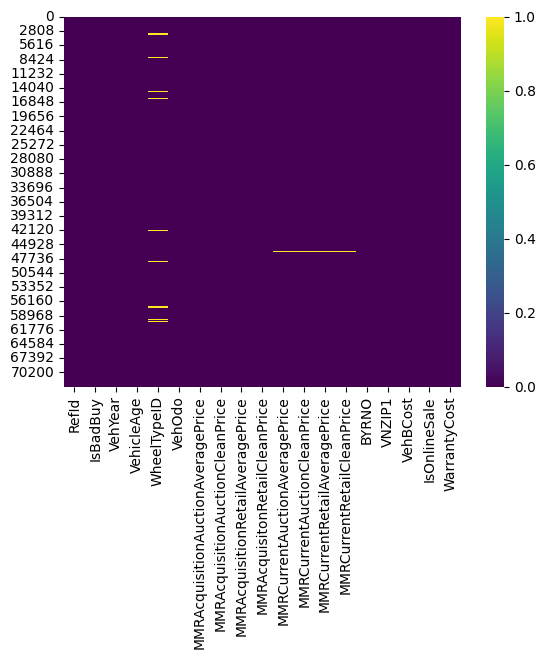

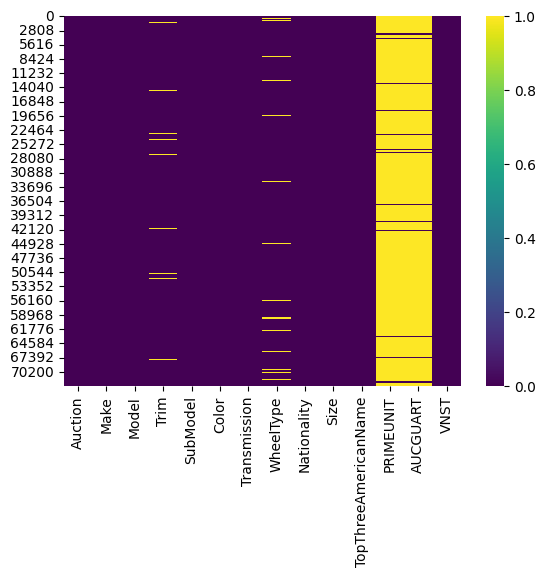

In [129]:
# Select all numerical and categorical columns
num_cols = car_df.select_dtypes(include=['float64', 'int64']).columns
cat_cols = car_df.select_dtypes(include=['object']).columns

# Create a heatmap of missing values using Seaborn for numerical columns
sns.heatmap(car_df[num_cols].isnull(), cmap='viridis')

# Show the heatmap for numerical columns
plt.show()

# Create a heatmap of missing values using Seaborn for categorical columns
sns.heatmap(car_df[cat_cols].isnull(), cmap='viridis')

# Show the heatmap for categorical columns
plt.show()

#Major missing values are from 2 attributes i.e. 'PRIMEUNIT', 'AUCGUART'

In [130]:
# Drop the 'col1' and 'col2' columns
car_df = car_df.drop(['PRIMEUNIT', 'AUCGUART','VNZIP1','RefId'], axis=1)


Cleanup¶

Preprocessing and cleaning up data is an important aspect of data analysis.

Show the column names.


In [131]:
car_df.duplicated().sum()

0

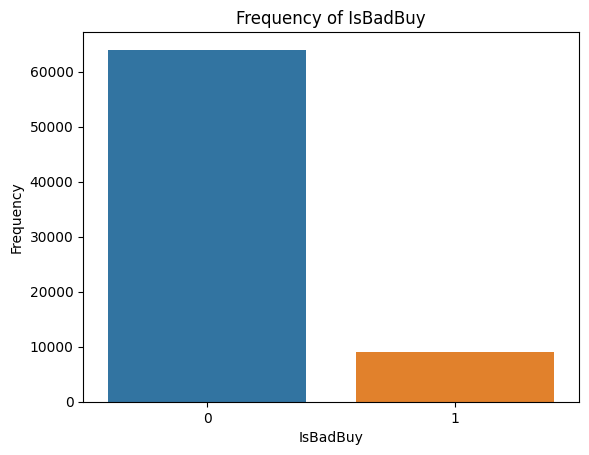

In [132]:
# Get the frequency of each value in the Isabadbuy column
is_bad_buy_counts = car_df['IsBadBuy'].value_counts()

# Create a bar chart using seaborn
sns.barplot(x=is_bad_buy_counts.index, y=is_bad_buy_counts.values)

# Set the chart title and labels
plt.title('Frequency of IsBadBuy')
plt.xlabel('IsBadBuy')
plt.ylabel('Frequency')

# Show the chart
plt.show()

In [133]:
# Get the frequency of each value in the Isabadbuy column
is_bad_buy_counts = car_df['IsBadBuy'].value_counts()

# Print the frequency of 0 (not a bad buy)
print("Number of non-bad buys:", is_bad_buy_counts[0])

# Print the frequency of 1 (bad buy)
print("Number of bad buys:", is_bad_buy_counts[1])

#Not a bad buy: 87.7% bad buy: 12.3%


Number of non-bad buys: 64007
Number of bad buys: 8976


C:\Users\priya\AppData\Local\Temp\ipykernel_25604\3650632034.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = car_df.corr()


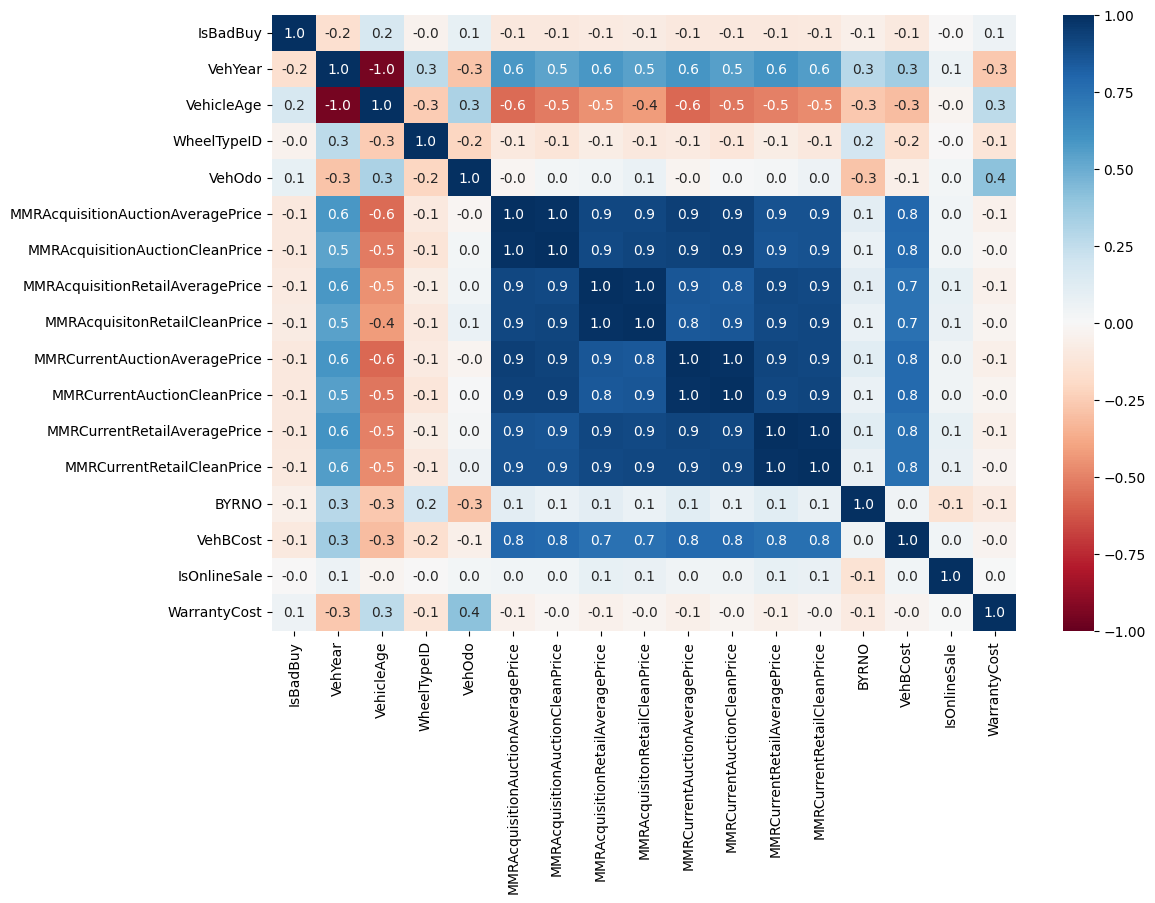

In [134]:
corr = car_df.corr()
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
sns.heatmap(corr, annot=True, fmt=".1f", vmin=-1, vmax=1, cmap="RdBu", center=0, ax=ax)

plt.show()

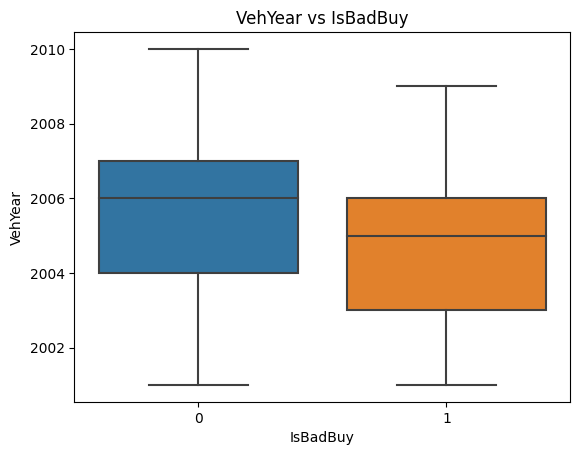

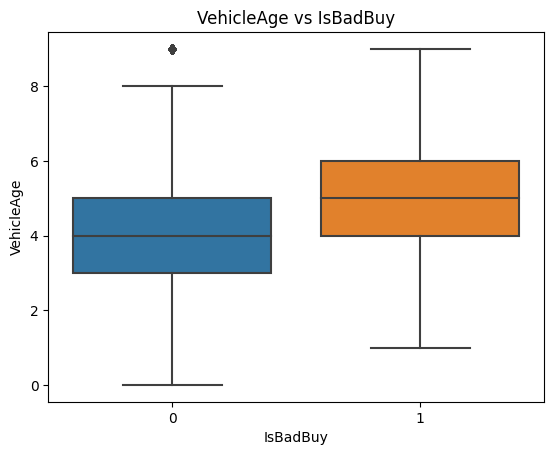

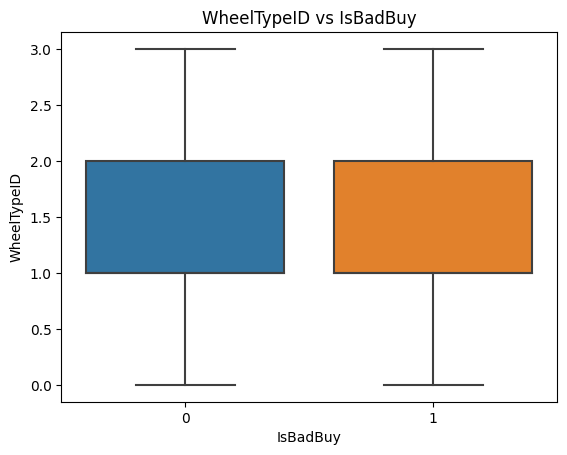

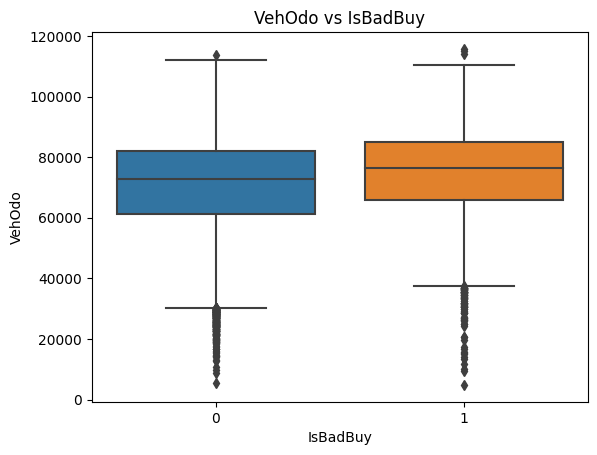

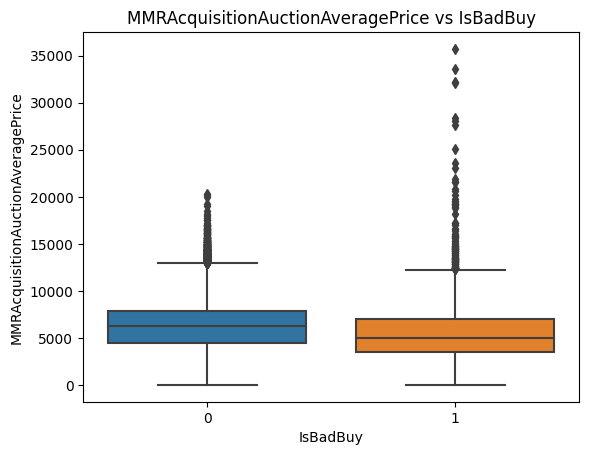

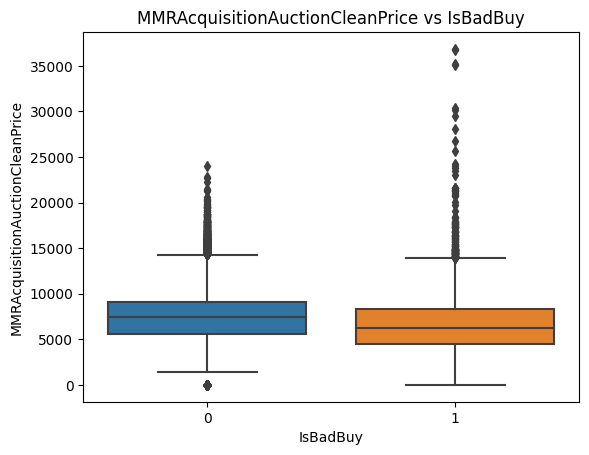

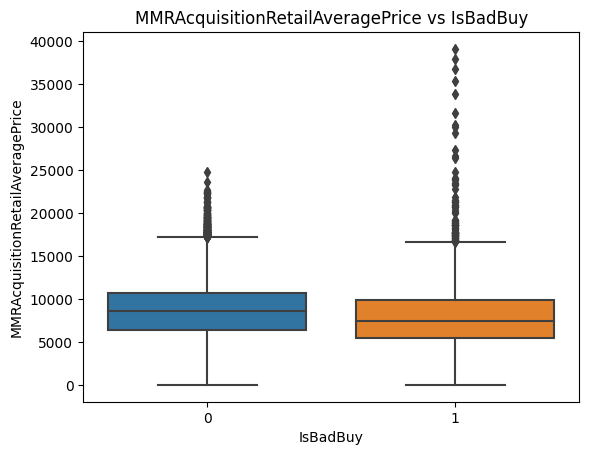

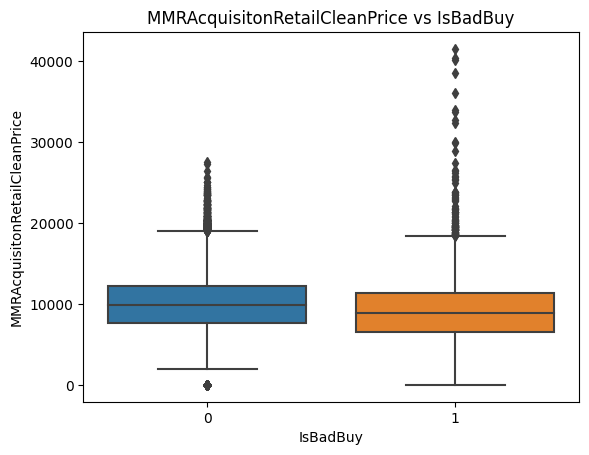

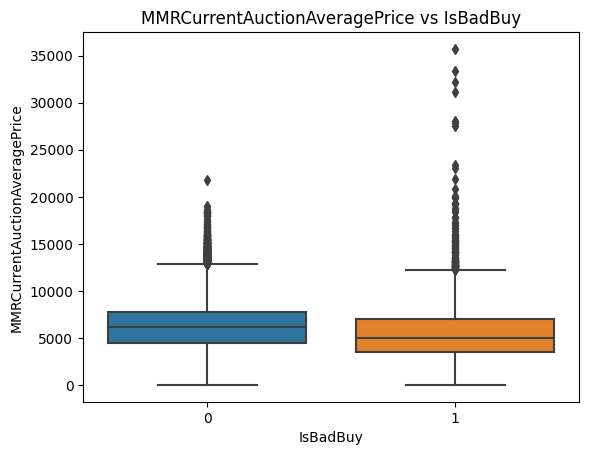

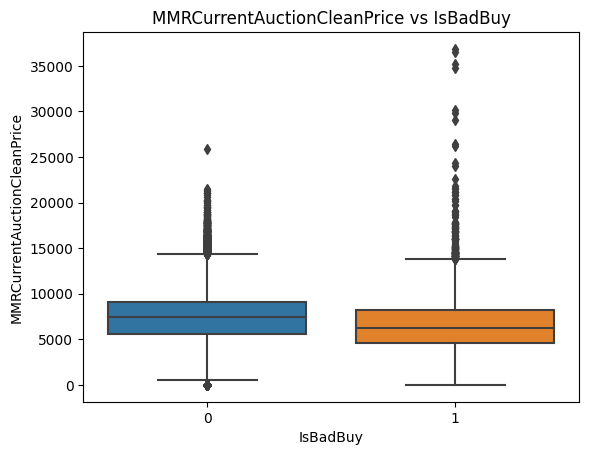

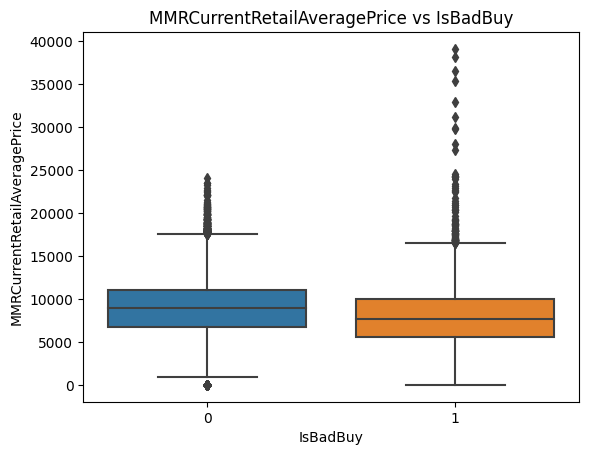

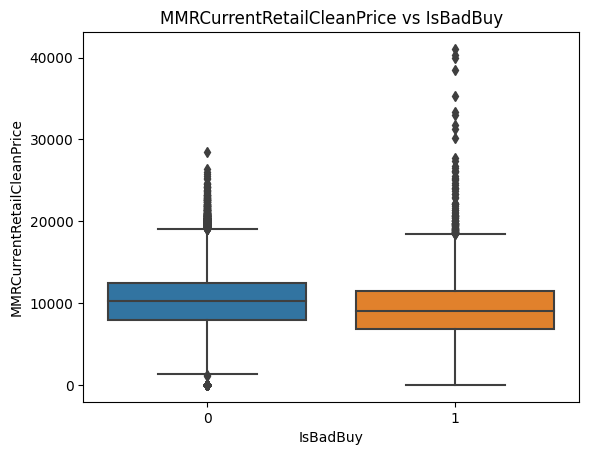

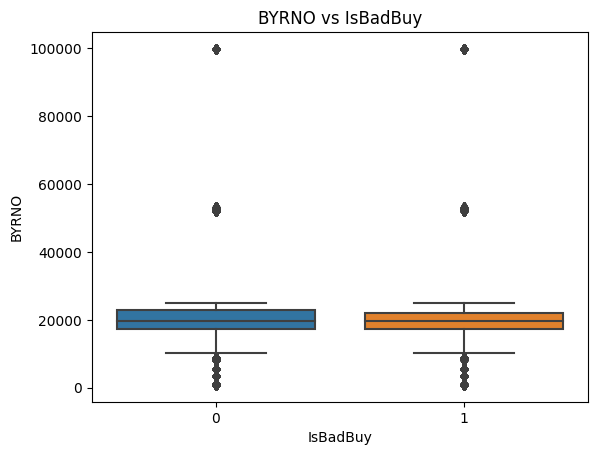

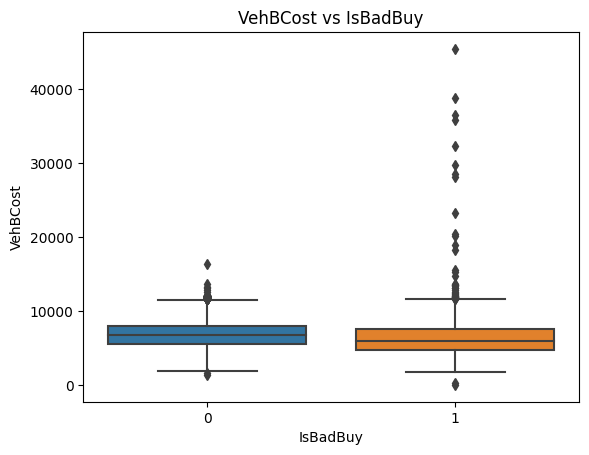

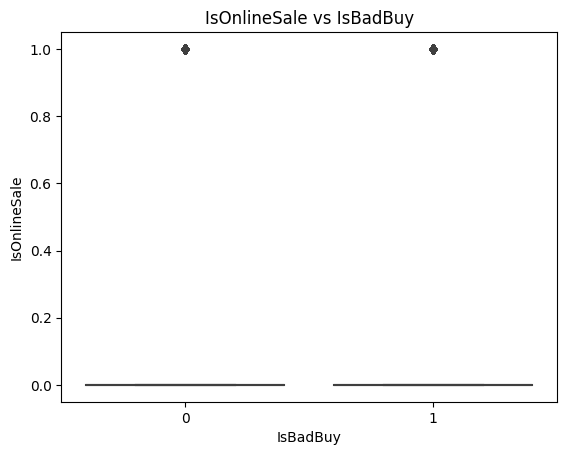

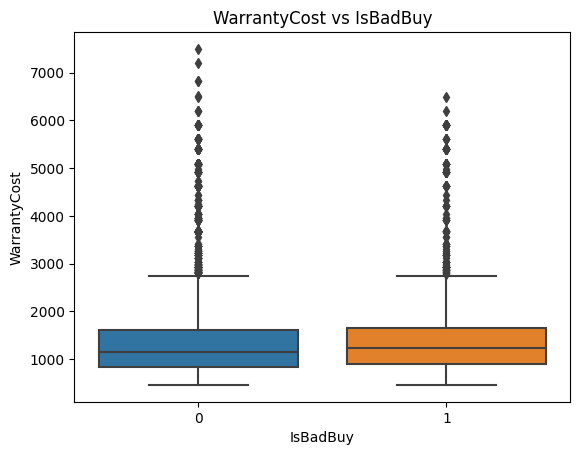

In [135]:
# Select all numerical columns except IsBadBuy
num_cols = car_df.select_dtypes(include=['float64', 'int64']).columns.drop('IsBadBuy')

# Create box plots for each numerical variable, grouped by IsBadBuy
for col in num_cols:
    sns.boxplot(x='IsBadBuy', y=col, data=car_df)
    plt.title(f"{col} vs IsBadBuy")
    plt.show()

In [136]:
cat_cols = car_df.select_dtypes(include=['object']).columns
cat_cols

Index(['Auction', 'Make', 'Model', 'Trim', 'SubModel', 'Color', 'Transmission',
       'WheelType', 'Nationality', 'Size', 'TopThreeAmericanName', 'VNST'],
      dtype='object')

In [137]:
pd.crosstab(car_df['VehYear'], car_df['IsBadBuy'], normalize='columns')


IsBadBuy,0,1
VehYear,,
2001,0.016483,0.047460
2002,0.040417,0.091132
2003,0.078382,0.134804
2004,0.134673,0.176805
2005,0.210243,0.226381
2006,0.241270,0.178253
2007,0.164591,0.098930
2008,0.101551,0.042892
2009,0.012374,0.003342


In [138]:
pd.crosstab(car_df['VehicleAge'], car_df['IsBadBuy'], normalize='columns')


IsBadBuy,0,1
VehicleAge,,
0,0.000031,0.000000
1,0.046386,0.013926
2,0.124080,0.060160
3,0.228116,0.144942
4,0.236677,0.207665
5,0.172809,0.211119
6,0.102723,0.161208
7,0.056884,0.111965
8,0.025357,0.066511


In [139]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Create a formula for the ANOVA model
formula = 'IsBadBuy ~ ' + ' + '.join(num_cols)

# Fit the ANOVA model
model = ols(formula=formula, data=car_df).fit()

# Perform ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)

# Print the ANOVA table
print(anova_table)


# VehicleAge, VehOdo,and VehBCost, low p-value

                                        sum_sq       df           F  \
VehYear                               0.008944      1.0    0.106131   
VehicleAge                            2.602469      1.0   30.882894   
WheelTypeID                           0.379414      1.0    4.502422   
VehOdo                                2.521980      1.0   29.927754   
MMRAcquisitionAuctionAveragePrice     0.066757      1.0    0.792188   
MMRAcquisitionAuctionCleanPrice       0.103050      1.0    1.222871   
MMRAcquisitionRetailAveragePrice      0.450728      1.0    5.348689   
MMRAcquisitonRetailCleanPrice         0.126383      1.0    1.499755   
MMRCurrentAuctionAveragePrice         0.359862      1.0    4.270402   
MMRCurrentAuctionCleanPrice           0.053143      1.0    0.630633   
MMRCurrentRetailAveragePrice          0.081027      1.0    0.961533   
MMRCurrentRetailCleanPrice            0.316266      1.0    3.753057   
BYRNO                                 3.353318      1.0   39.793040   
VehBCo

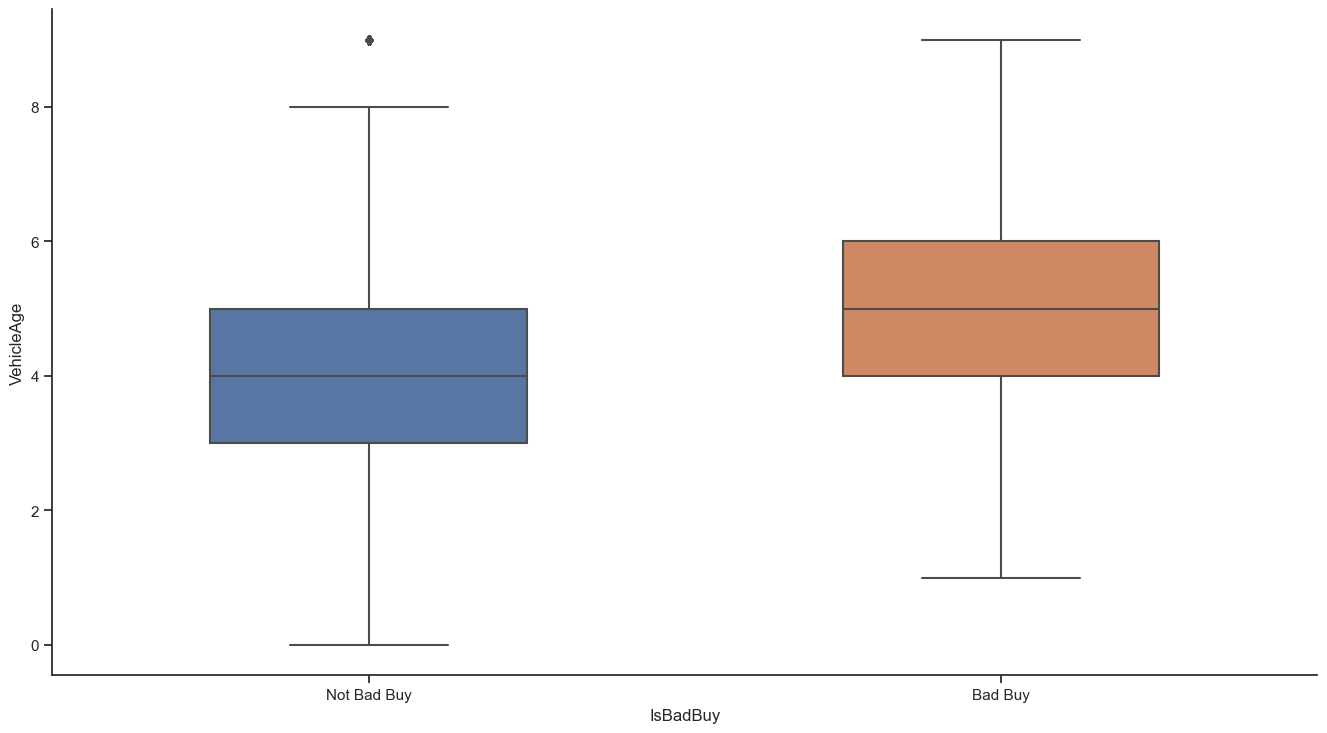

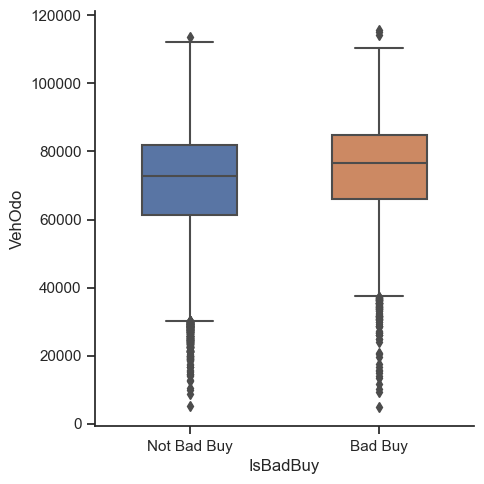

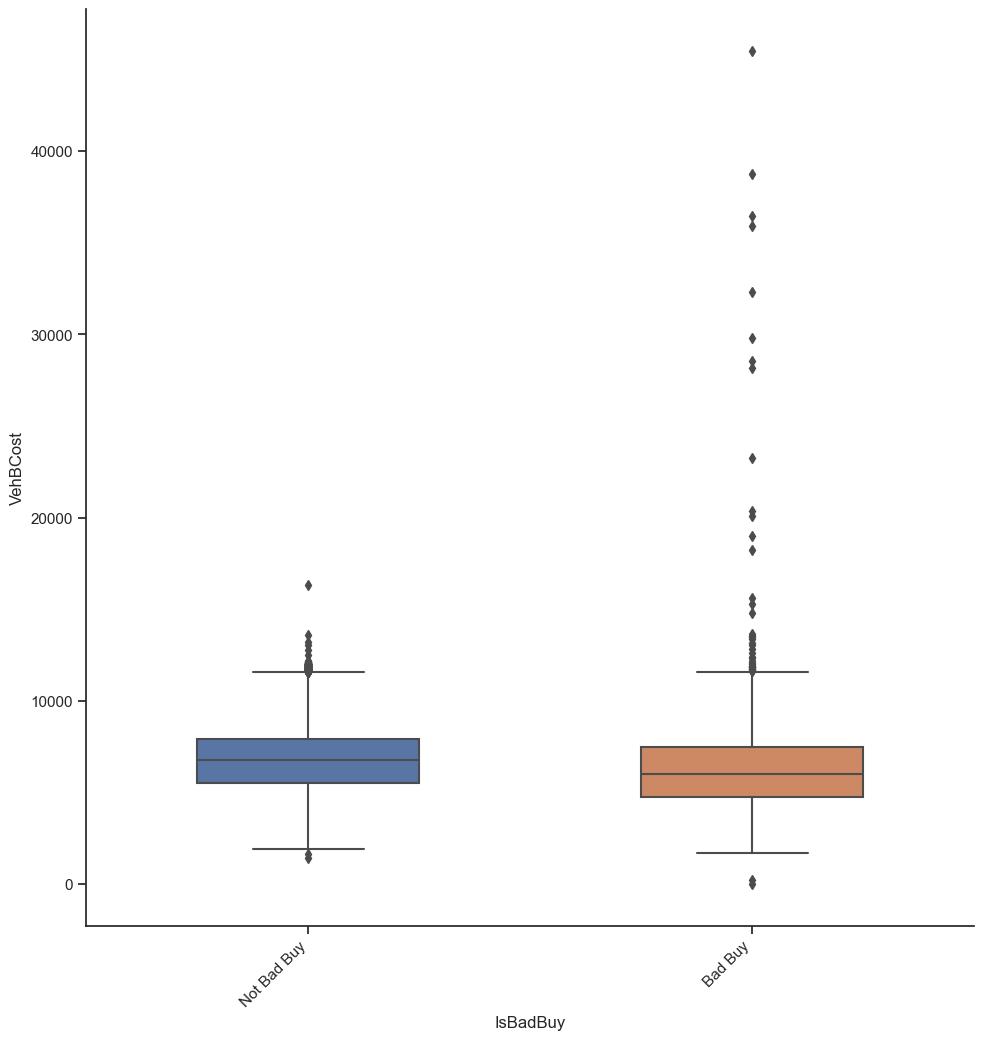

In [140]:
sns.set(style="ticks", color_codes=True)

g = sns.catplot(x="IsBadBuy", y="VehicleAge", kind="box", data=car_df, width=0.5, height=5)
g.set_xticklabels(['Not Bad Buy', 'Bad Buy'])
g.set_titles('{col_name}')

g1 = sns.catplot(x="IsBadBuy", y="VehOdo", kind="box", data=car_df, width=0.5, height=5)
g1.set_xticklabels(['Not Bad Buy', 'Bad Buy'])
g1.set_titles('{col_name}')


g2 = sns.catplot(x="IsBadBuy", y="VehBCost", kind="box", data=car_df, width=0.5, height=10)
g2.set_xticklabels(['Not Bad Buy', 'Bad Buy'])
g2.set_titles('{col_name}')

sns.set(font_scale=1.5)
sns.set_style("whitegrid")
sns.set_palette("husl")

g.fig.set_size_inches(15,8)

plt.xticks(rotation=45, ha='right')
plt.show()



IndexError: index 3 is out of bounds for axis 0 with size 3

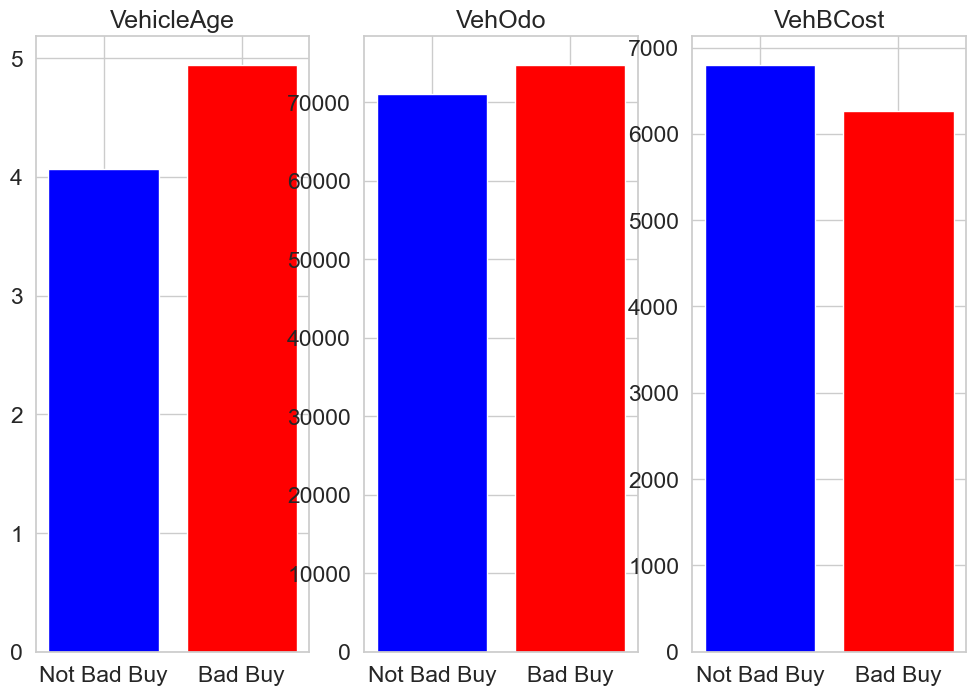

In [141]:
# Define the variables and their labels
variables = ['VehicleAge', 'VehOdo', 'VehBCost', 'IsOnlineSale', 'VNST']
labels = ['Not Bad Buy', 'Bad Buy']
colors = ['blue', 'red']

# Create a 1x3 bar plot
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12,8))

# Loop through each variable and plot a bar chart for each
for i, var in enumerate(variables):
    axs[i].bar(labels, car_df.groupby('IsBadBuy')[var].mean(), color=colors)
    axs[i].set_title(var)
    
# Add a title for the entire plot
fig.suptitle('Mean Values of Car Features by IsBadBuy', fontsize=16)

# Adjust the spacing between subplots
fig.tight_layout(pad=3.0)



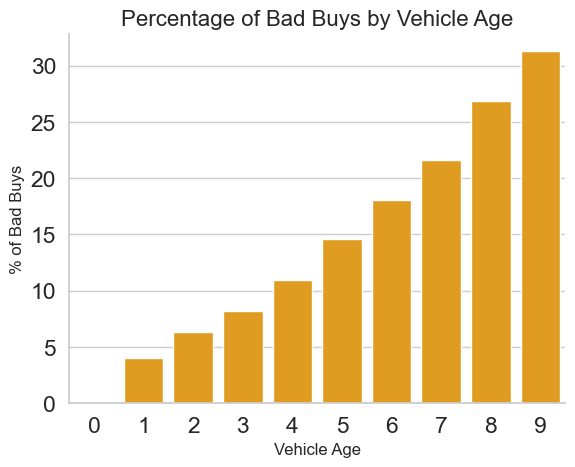

In [142]:
# Group data by vehicle age and calculate percentage of bad buys
age_counts = car_df.groupby('VehicleAge')['IsBadBuy'].value_counts(normalize=True).unstack()
age_counts = age_counts.fillna(0) # Fill missing values with 0
age_counts['BadBuyPercent'] = age_counts[1] * 100 # Calculate percentage of bad buys
age_counts = age_counts.reset_index()

# Create bar plot
sns.barplot(data=age_counts, x='VehicleAge', y='BadBuyPercent', color='orange')
sns.despine() # Remove spines
plt.title('Percentage of Bad Buys by Vehicle Age', fontsize=16)
plt.xlabel('Vehicle Age', fontsize=12)
plt.ylabel('% of Bad Buys', fontsize=12)
plt.show()


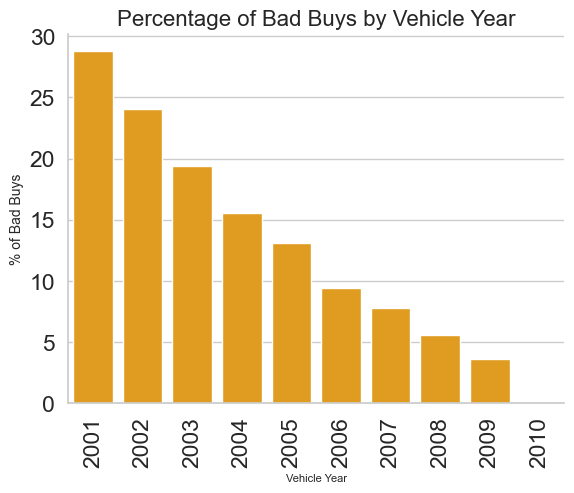

In [148]:
# Group data by vehicle year and calculate percentage of bad buys
age_counts = car_df.groupby('VehYear')['IsBadBuy'].value_counts(normalize=True).unstack()
age_counts = age_counts.fillna(0) # Fill missing values with 0
age_counts['BadBuyPercent'] = age_counts[1] * 100 # Calculate percentage of bad buys
age_counts = age_counts.reset_index()

# Create bar plot
sns.barplot(data=age_counts, x='VehYear', y='BadBuyPercent', color='orange')
sns.despine() # Remove spines
plt.title('Percentage of Bad Buys by Vehicle Year', fontsize=16)
plt.xlabel('Vehicle Year', fontsize=8)
plt.ylabel('% of Bad Buys', fontsize=10)
plt.xticks(rotation=90)
plt.show()


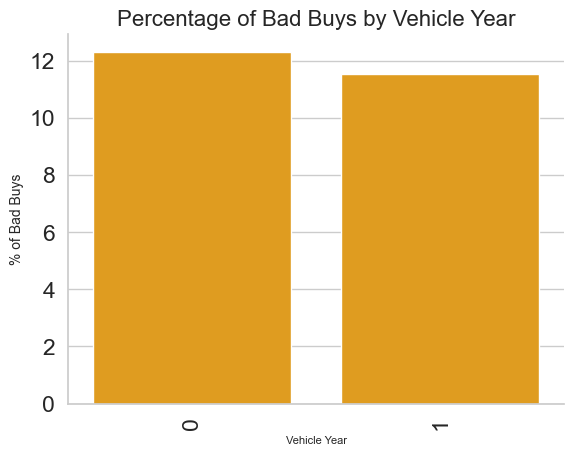

In [144]:
# Group data by vehicle age and calculate percentage of bad buys
age_counts = car_df.groupby('IsOnlineSale')['IsBadBuy'].value_counts(normalize=True).unstack()
age_counts = age_counts.fillna(0) # Fill missing values with 0
age_counts['BadBuyPercent'] = age_counts[1] * 100 # Calculate percentage of bad buys
age_counts = age_counts.reset_index()

# Create bar plot
sns.barplot(data=age_counts, x='IsOnlineSale', y='BadBuyPercent', color='orange')
sns.despine() # Remove spines
plt.title('Percentage of Bad Buys by Vehicle Year', fontsize=16)
plt.xlabel('Vehicle Year', fontsize=8)
plt.ylabel('% of Bad Buys', fontsize=10)
plt.xticks(rotation=90)
plt.show()


C:\Users\priya\AppData\Local\Temp\ipykernel_25604\321127007.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dataForPlot = car_df.groupby(pd.cut(car_df.MMRAcquisitionAuctionAveragePrice, bins=7, right=True)).mean()['IsBadBuy']


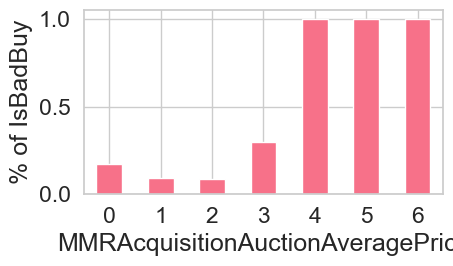

In [149]:
dataForPlot = car_df.groupby(pd.cut(car_df.MMRAcquisitionAuctionAveragePrice, bins=7, right=True)).mean()['IsBadBuy'] 
ax = dataForPlot.plot(kind='bar', figsize=[5, 3])
ax.set_ylabel('% of IsBadBuy')
ax.set_xticklabels(ax.get_xticks(), rotation = 0)

plt.tight_layout()
plt.show()

In [150]:
pd.cut(car_df.MMRAcquisitionAuctionAveragePrice, bins=7, right=True)

0        (5103.143, 10206.286]
1        (5103.143, 10206.286]
2          (-35.722, 5103.143]
3          (-35.722, 5103.143]
4          (-35.722, 5103.143]
                 ...          
72978      (-35.722, 5103.143]
72979    (5103.143, 10206.286]
72980    (5103.143, 10206.286]
72981    (5103.143, 10206.286]
72982    (5103.143, 10206.286]
Name: MMRAcquisitionAuctionAveragePrice, Length: 72983, dtype: category
Categories (7, interval[float64, right]): [(-35.722, 5103.143] < (5103.143, 10206.286] < (10206.286, 15309.429] < (15309.429, 20412.571] < (20412.571, 25515.714] < (25515.714, 30618.857] < (30618.857, 35722.0]]

C:\Users\priya\AppData\Local\Temp\ipykernel_25604\2948406945.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dataForPlot = car_df.groupby(pd.cut(car_df.VehOdo, bins=7, right=True)).mean()['IsBadBuy']


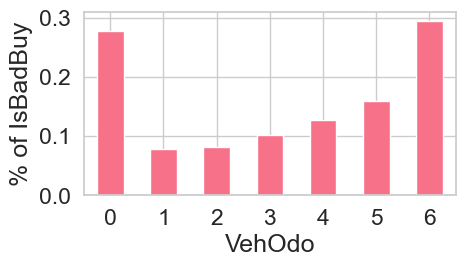

In [151]:
dataForPlot = car_df.groupby(pd.cut(car_df.VehOdo, bins=7, right=True)).mean()['IsBadBuy'] 
ax = dataForPlot.plot(kind='bar', figsize=[5, 3])
ax.set_ylabel('% of IsBadBuy')
ax.set_xticklabels(ax.get_xticks(), rotation = 0)

plt.tight_layout()
plt.show()

In [152]:
pd.cut(car_df.VehOdo, bins=7, right=True)

0        (84033.571, 99875.286]
1        (84033.571, 99875.286]
2        (68191.857, 84033.571]
3        (52350.143, 68191.857]
4        (68191.857, 84033.571]
                  ...          
72978    (36508.429, 52350.143]
72979    (68191.857, 84033.571]
72980    (84033.571, 99875.286]
72981    (68191.857, 84033.571]
72982    (52350.143, 68191.857]
Name: VehOdo, Length: 72983, dtype: category
Categories (7, interval[float64, right]): [(4714.108, 20666.714] < (20666.714, 36508.429] < (36508.429, 52350.143] < (52350.143, 68191.857] < (68191.857, 84033.571] < (84033.571, 99875.286] < (99875.286, 115717.0]]

In [5]:
import os
print(os.listdir()) 
os.chdir('C:\\Users\\priya\\OneDrive\\Desktop\\Spring 23\\BAN 620 Data Mining\\Case Assignments\\Case 1')
airfares_df = pd.read_csv('Airfares_Case1.csv')
airfares_df.head()
airfares_df = airfares_df.drop(['S_CODE','S_CITY','E_CODE','E_CITY'], axis=1)



['Airfares(1).csv', 'Airfarestry.csv', 'Airfares_Case1.csv', 'Assignment_part2.ipynb', 'carvana.csv', 'Carvana_Case1.csv', 'DM ASSIGNMENT1.docx', 'SSRN-id3614450.pdf', 'Team1_Case1_BAN 620.docx', 'Team1_Case1_BAN 620_Updated.docx']


In [113]:
airfares_df.shape

(638, 14)

In [12]:
#If you're unable to read some CSV files and it gives you UnicodeDecode error
import chardet
with open('Airfares_Case1.csv', 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}

In [88]:
print('Number of rows after removing rows with missing values: ', len(airfares_df))
# remove rows with missing values 
airfares_df = airfares_df.dropna()
print('Number of rows after removing rows with missing values: ', len(airfares_df))

Number of rows after removing rows with missing values:  638
Number of rows after removing rows with missing values:  638


C:\Users\priya\AppData\Local\Temp\ipykernel_25604\3156627498.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = airfares_df.corr()


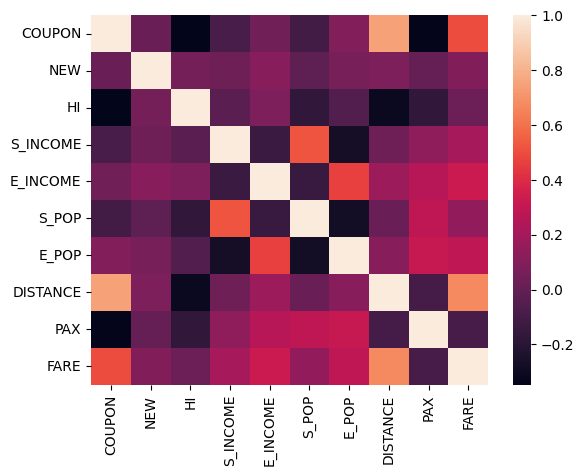

In [89]:
corr = airfares_df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)
plt.show()

In [13]:
num_cols = airfares_df.select_dtypes(include=['float64', 'int64']).columns
cat_cols = airfares_df.select_dtypes(include=['object']).columns
airfares_num = airfares_df[num_cols]

In [14]:
corr_matrix = airfares_df.corr()

print(corr_matrix['FARE'].sort_values(ascending=False))

FARE        1.000000
DISTANCE    0.670016
COUPON      0.496537
E_INCOME    0.326092
E_POP       0.285043
S_INCOME    0.209135
S_POP       0.145097
NEW         0.091730
HI          0.025195
PAX        -0.090705
Name: FARE, dtype: float64


C:\Users\priya\AppData\Local\Temp\ipykernel_45444\2126422084.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = airfares_df.corr()


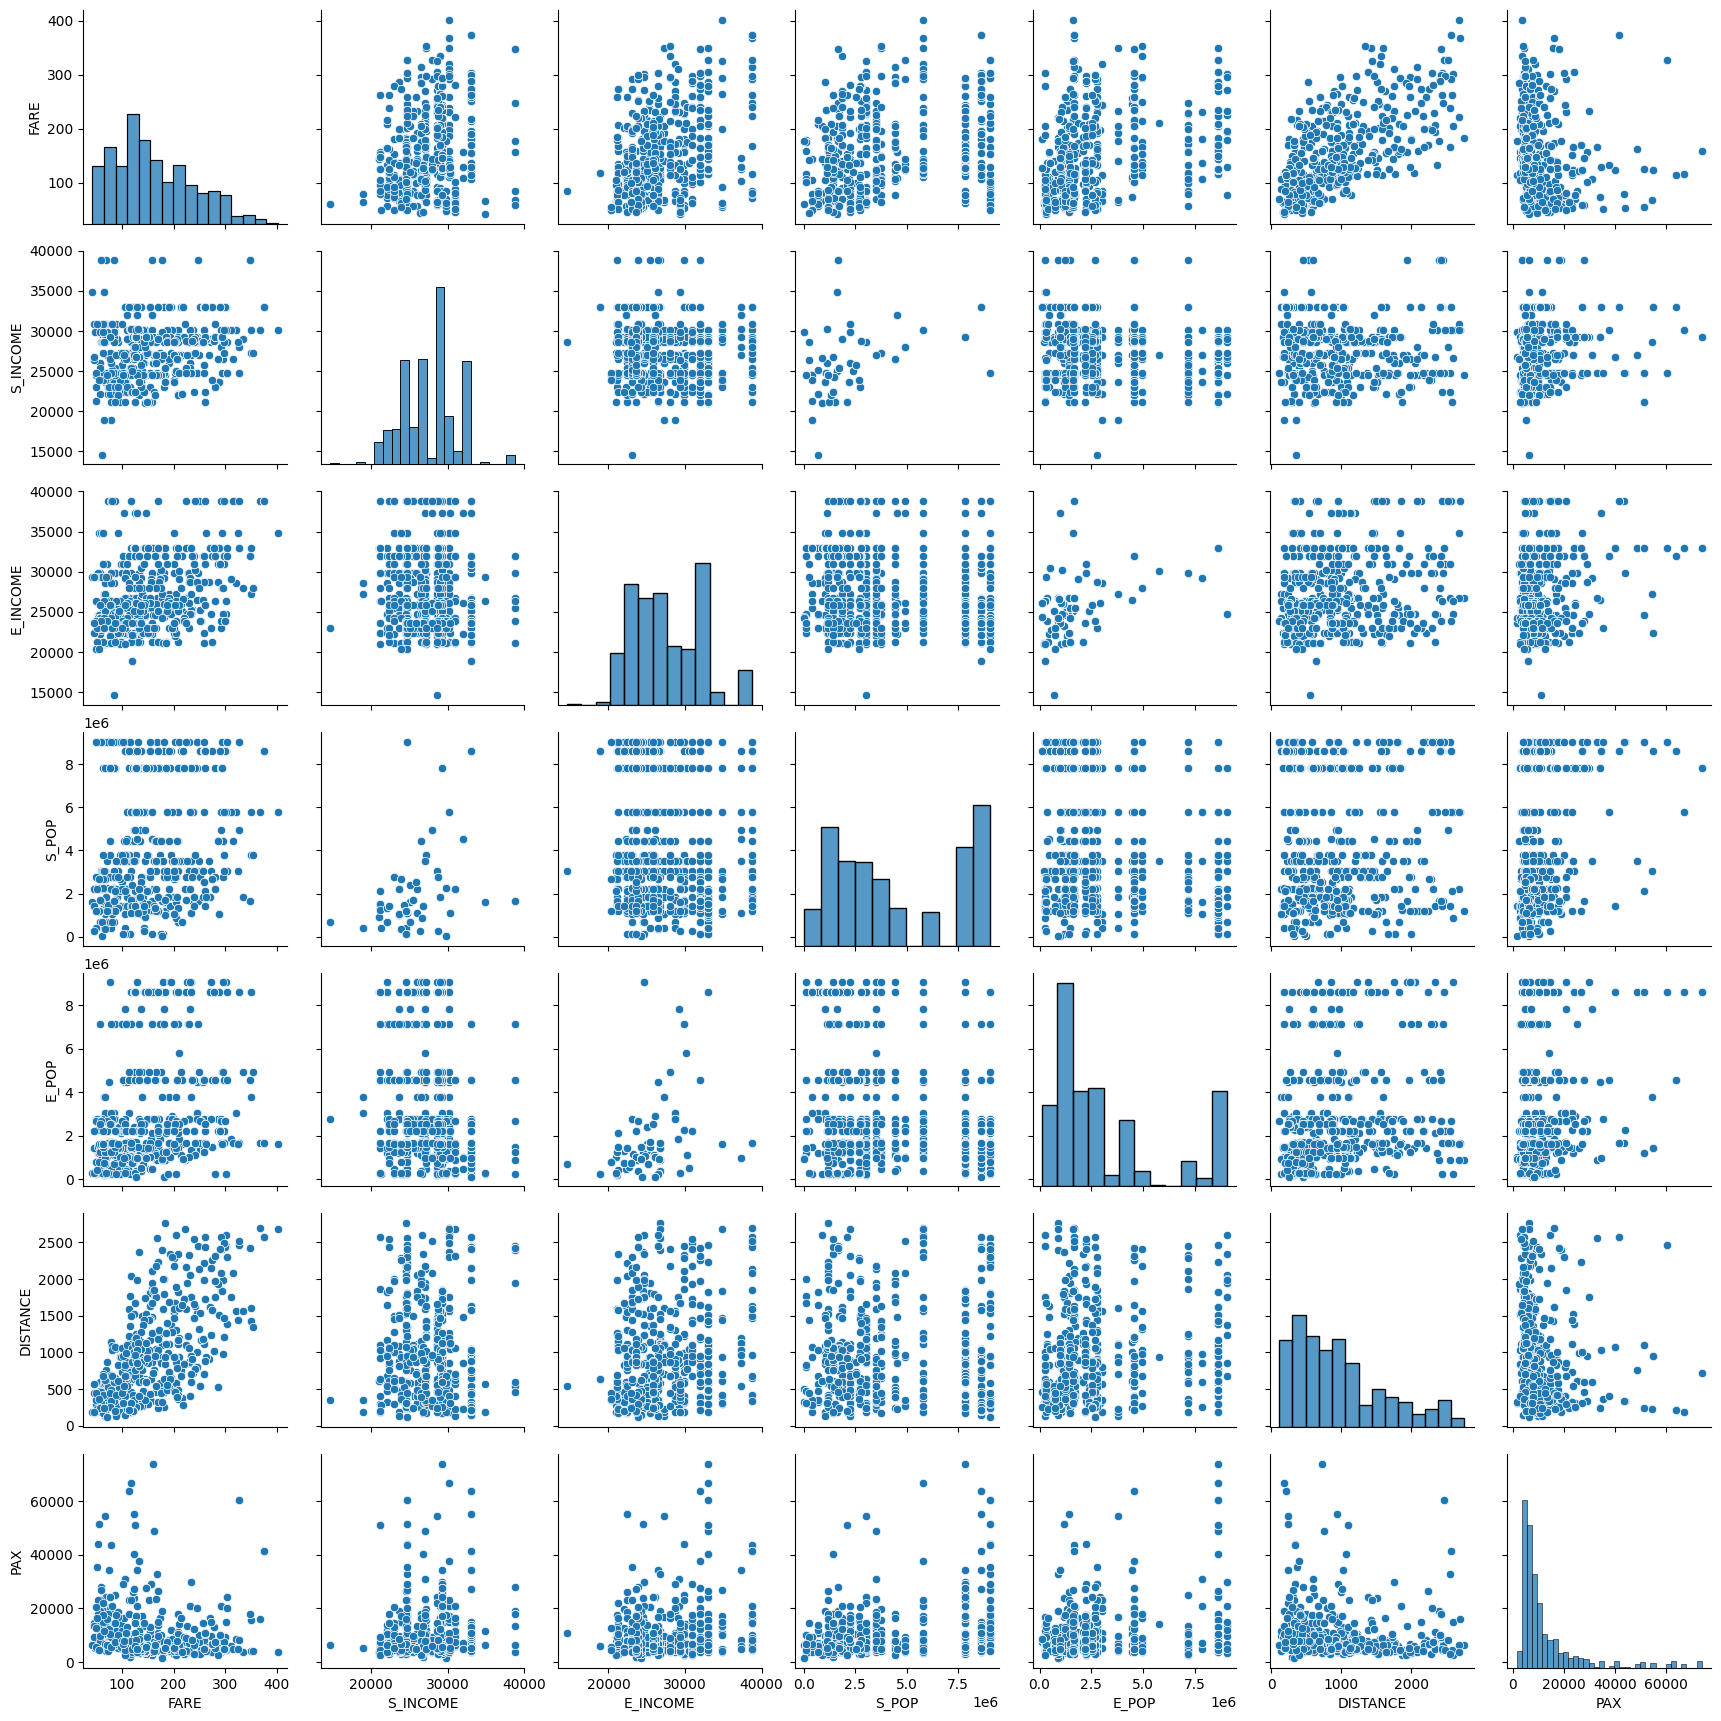

In [10]:
# Plot the pair plot of numerical variables
sns.pairplot(airfares_df[['FARE', 'S_INCOME', 'E_INCOME', 'S_POP', 'E_POP', 'DISTANCE', 'PAX']])

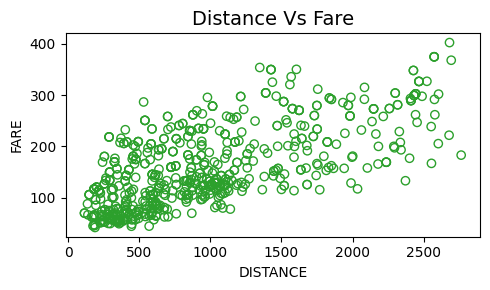

In [98]:
# Set the color of the points in the scatterplot and draw as open circles.
fig, ax = plt.subplots()
fig.set_size_inches(5, 3)

ax.scatter(airfares_df.DISTANCE, airfares_df.FARE, color='C2', facecolor='none') #facecolor none leaves the bubble unfilled
plt.xlabel('DISTANCE')
plt.ylabel('FARE')
plt.title("Distance Vs Fare", size=14)

plt.tight_layout()
plt.show()

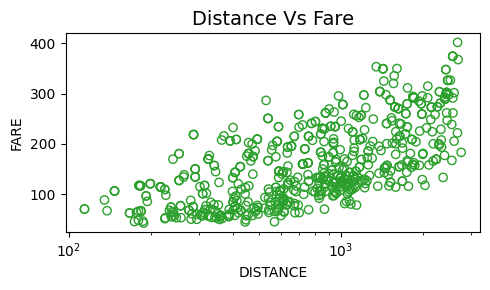

In [99]:
# Set the color of the points in the scatterplot and draw as open circles.
fig, ax = plt.subplots()
fig.set_size_inches(5, 3)

ax.scatter(airfares_df.DISTANCE, airfares_df.FARE, color='C2', facecolor='none') #facecolor none leaves the bubble unfilled
ax.set_xscale("log");
plt.xlabel('DISTANCE')
plt.ylabel('FARE')
plt.title("Distance Vs Fare", size=14)

plt.tight_layout()
plt.show()

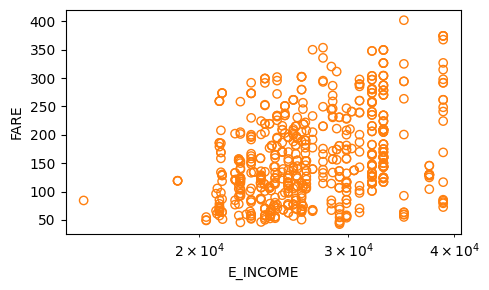

In [97]:
# Set the color of the points in the scatterplot and draw as open circles.
fig, ax = plt.subplots()
fig.set_size_inches(5, 3)

ax.scatter(airfares_df.E_INCOME, airfares_df.FARE, color='C1', facecolor='none') #facecolor none leaves the bubble unfilled
plt.xlabel('E_INCOME')
plt.ylabel('FARE')
ax.set_xscale("log")

plt.tight_layout()
plt.show()

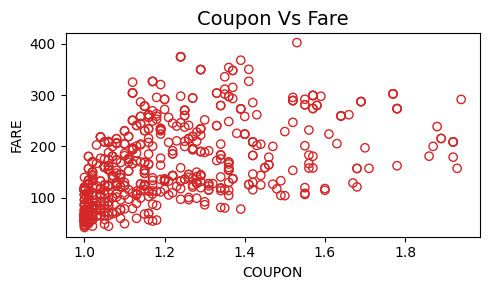

In [101]:
# Set the color of the points in the scatterplot and draw as open circles.
fig, ax = plt.subplots()
fig.set_size_inches(5, 3)

ax.scatter(airfares_df.COUPON, airfares_df.FARE, color='C3', facecolor='none') #facecolor none leaves the bubble unfilled
plt.xlabel('COUPON')
plt.ylabel('FARE')
plt.title("Coupon Vs Fare", size=14)

plt.tight_layout()
plt.show()

In [48]:
airfares_df.dtypes

S_CODE       object
S_CITY       object
E_CODE       object
E_CITY       object
COUPON      float64
NEW           int64
VACATION     object
SW           object
HI          float64
S_INCOME    float64
E_INCOME    float64
S_POP         int64
E_POP         int64
SLOT         object
GATE         object
DISTANCE      int64
PAX           int64
FARE        float64
dtype: object

C:\Users\priya\AppData\Local\Temp\ipykernel_25604\2374730791.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dataForPlot = airfares_df.groupby('GATE').mean()['FARE']


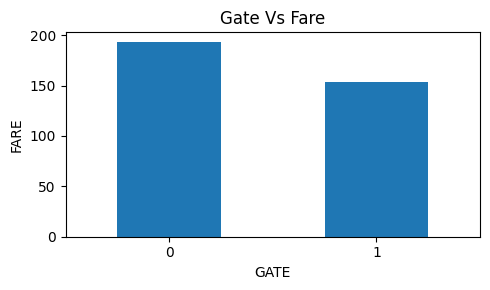

C:\Users\priya\AppData\Local\Temp\ipykernel_25604\2374730791.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  airfares_df.groupby('GATE').mean()['FARE']


GATE
Constrained    193.129032
Free           153.095953
Name: FARE, dtype: float64

In [103]:
dataForPlot = airfares_df.groupby('GATE').mean()['FARE'] 
ax = dataForPlot.plot(kind='bar', figsize=[5, 3])
ax.set_ylabel('FARE')
ax.set_xticklabels(ax.get_xticks(), rotation = 0)
plt.title("Gate Vs Fare", size=12)

plt.tight_layout()
plt.show()

airfares_df.groupby('GATE').mean()['FARE']

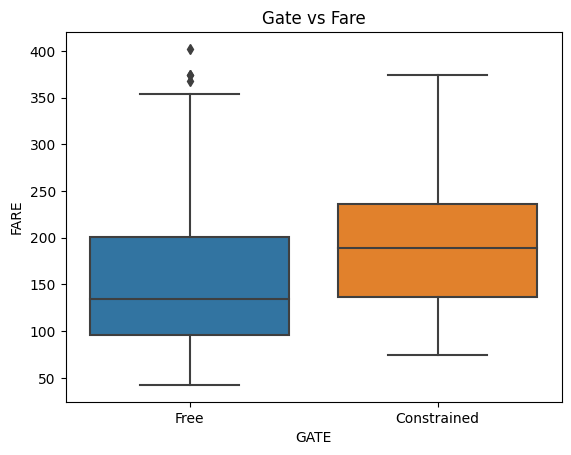

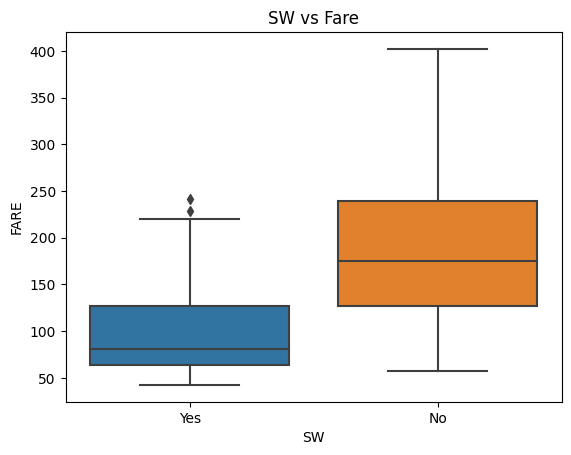

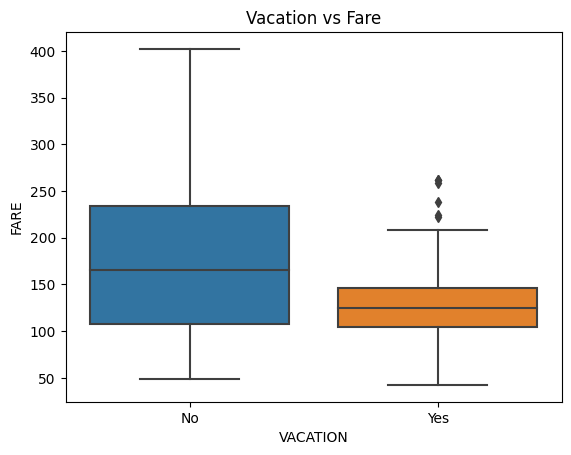

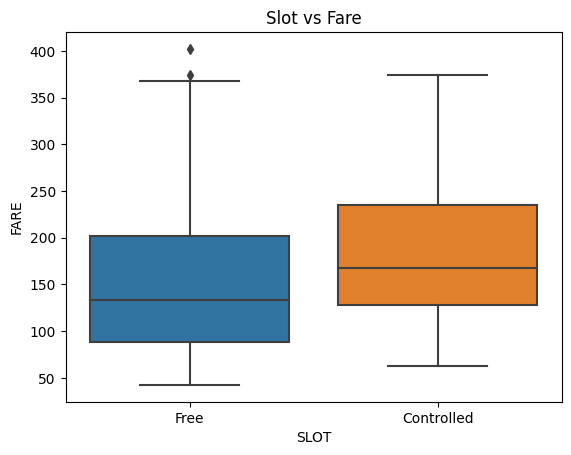

In [108]:
sns.boxplot(x="GATE", y="FARE" ,data=airfares_df)
plt.title("Gate vs Fare", size=12)
plt.show()

sns.boxplot(x="SW", y="FARE" ,data=airfares_df)
plt.title("SW vs Fare", size=12)
plt.show()

sns.boxplot(x="VACATION", y="FARE" ,data=airfares_df)
plt.title("Vacation vs Fare", size=12)
plt.show()

sns.boxplot(x="SLOT", y="FARE" ,data=airfares_df)
plt.title("Slot vs Fare", size=12)
plt.show()

C:\Users\priya\AppData\Local\Temp\ipykernel_25604\110360427.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dataForPlot = airfares_df.groupby('SW').mean()['FARE']


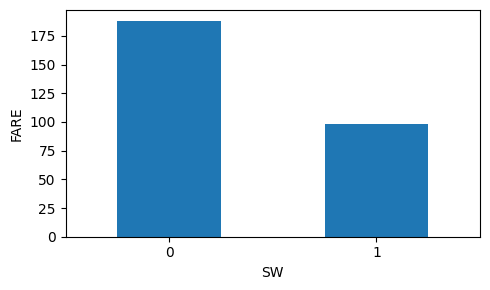

C:\Users\priya\AppData\Local\Temp\ipykernel_25604\110360427.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  airfares_df.groupby('SW').mean()['FARE']


SW
No     188.182793
Yes     98.382268
Name: FARE, dtype: float64

In [29]:
dataForPlot = airfares_df.groupby('SW').mean()['FARE'] 
ax = dataForPlot.plot(kind='bar', figsize=[5, 3])
ax.set_ylabel('FARE')
ax.set_xticklabels(ax.get_xticks(), rotation = 0)

plt.tight_layout()
plt.show()

airfares_df.groupby('SW').mean()['FARE']

C:\Users\priya\AppData\Local\Temp\ipykernel_25604\768467192.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dataForPlot = airfares_df.groupby('VACATION').mean()['FARE']


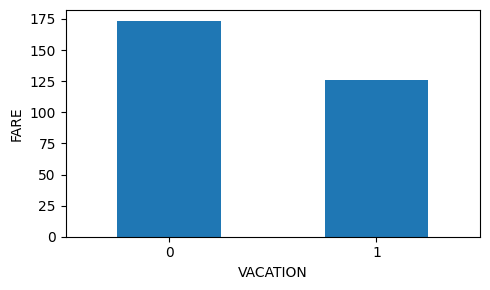

C:\Users\priya\AppData\Local\Temp\ipykernel_25604\768467192.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  airfares_df.groupby('VACATION').mean()['FARE']


VACATION
No     173.552500
Yes    125.980882
Name: FARE, dtype: float64

In [30]:
dataForPlot = airfares_df.groupby('VACATION').mean()['FARE'] 
ax = dataForPlot.plot(kind='bar', figsize=[5, 3])
ax.set_ylabel('FARE')
ax.set_xticklabels(ax.get_xticks(), rotation = 0)

plt.tight_layout()
plt.show()

airfares_df.groupby('VACATION').mean()['FARE']

C:\Users\priya\AppData\Local\Temp\ipykernel_25604\3962072303.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dataForPlot = airfares_df.groupby('SLOT').mean()['FARE']


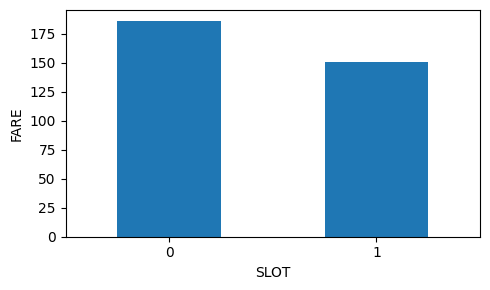

C:\Users\priya\AppData\Local\Temp\ipykernel_25604\3962072303.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  airfares_df.groupby('SLOT').mean()['FARE']


SLOT
Controlled    186.059396
Free          150.825680
Name: FARE, dtype: float64

In [106]:
dataForPlot = airfares_df.groupby('SLOT').mean()['FARE'] 
ax = dataForPlot.plot(kind='bar', figsize=[5, 3])
ax.set_ylabel('FARE')
ax.set_xticklabels(ax.get_xticks(), rotation = 0)

plt.tight_layout()
plt.show()

airfares_df.groupby('SLOT').mean()['FARE']

In [15]:
trainData, validData = train_test_split(airfares_df, test_size=0.40, random_state=1)
print('Training   : ', trainData.shape)
print('Validation : ', validData.shape)

Training   :  (382, 14)
Validation :  (256, 14)


In [35]:
airfares_df.columns
predictors = ['COUPON', 'VACATION',
       'SW', 'S_INCOME', 'E_INCOME', 'S_POP', 'E_POP', 'SLOT', 'GATE',
       'DISTANCE']
outcome = 'FARE'

# partition data
X = pd.get_dummies(airfares_df[predictors], drop_first=True)
y = airfares_df[outcome]
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=20)

car_lm = LinearRegression()
car_lm.fit(train_X, train_y)

# print coefficients
print('intercept ', car_lm.intercept_)
print(pd.DataFrame({'Predictor': X.columns, 'coefficient': car_lm.coef_}))

# print performance measures
regressionSummary(train_y, car_lm.predict(train_X)) #from dmba package

#MPE, MAPE- for giving percentage of error

intercept  31.900183633161646
      Predictor   coefficient
0        COUPON  3.295822e+01
1      S_INCOME  1.036303e-03
2      E_INCOME  1.583643e-03
3         S_POP  9.614807e-07
4         E_POP  1.082809e-06
5      DISTANCE  6.803775e-02
6  VACATION_Yes -5.229895e+01
7        SW_Yes -4.657359e+01
8     SLOT_Free -1.159022e+01
9     GATE_Free -2.569734e+01

Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 38.5923
            Mean Absolute Error (MAE) : 30.6238
          Mean Percentage Error (MPE) : -5.1773
Mean Absolute Percentage Error (MAPE) : 22.3906


In [36]:
pred_y = car_lm.predict(train_X)

print('adjusted r2 : ', adjusted_r2_score(train_y, pred_y, car_lm))
print('AIC : ', AIC_score(train_y, pred_y, car_lm))
print('BIC : ', BIC_score(train_y, pred_y, car_lm))

adjusted r2 :  0.7528336375723993
AIC :  3899.000525560812
BIC :  3946.345572864091


In [21]:
# Use predict() to make predictions on a new set
car_lm_pred = car_lm.predict(valid_X)

result = pd.DataFrame({'Predicted': car_lm_pred, 'Actual': valid_y,
                       'Residual': valid_y - car_lm_pred})
print(result.head(20))

# Compute common accuracy measures
regressionSummary(valid_y, car_lm_pred)

      Predicted  Actual   Residual
147  229.803346  133.35 -96.453346
495  321.261662  402.02  80.758338
285  221.288314  278.39  57.101686
175   77.850474   68.06  -9.790474
403  155.041474  154.73  -0.311474
269  216.974426  223.99   7.015574
14   148.944003  117.23 -31.714003
531   88.583727   77.62 -10.963727
206  198.799653  181.02 -17.779653
306   62.205317  104.33  42.124683
305  113.933562  140.90  26.966438
630  159.109295  145.53 -13.579295
580  175.761597  145.61 -30.151597
59   240.581509  154.74 -85.841509
370  131.874744  122.62  -9.254744
475  147.725375   83.74 -63.985375
588  237.525976  240.48   2.954024
257  154.667281  143.20 -11.467281
30   153.860024  134.30 -19.560024
435   14.850413   57.40  42.549587

Regression statistics

                      Mean Error (ME) : -0.9099
       Root Mean Squared Error (RMSE) : 39.9152
            Mean Absolute Error (MAE) : 32.2087
          Mean Percentage Error (MPE) : -4.5222
Mean Absolute Percentage Error (MAPE) : 23.7572


1.0


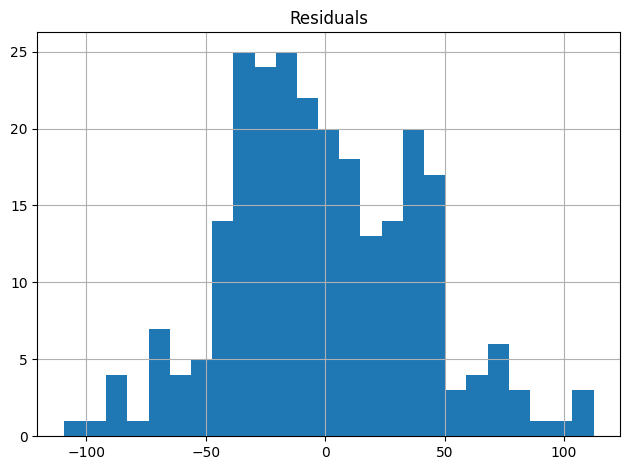

In [22]:
car_lm_pred = car_lm.predict(valid_X)
all_residuals = valid_y - car_lm_pred

# Determine the percentage of datapoints with a residual in [-1406, 1406] = approx. 75\%
print(len(all_residuals[(all_residuals > -1406) & (all_residuals < 1406)]) / len(all_residuals))

ax = pd.DataFrame({'Residuals': all_residuals}).hist(bins=25)

plt.tight_layout()
plt.show()

In [23]:
# run a linear regression of Price on the remaining 11 predictors in the training set
train_df = train_X.join(train_y)

predictors = train_X.columns
formula = 'FARE ~ ' + ' + '.join(predictors)

car_lm = sm.ols(formula=formula, data=train_df).fit()
print(car_lm.summary())

                            OLS Regression Results                            
Dep. Variable:                   FARE   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     117.0
Date:                Thu, 06 Apr 2023   Prob (F-statistic):          3.15e-108
Time:                        09:04:17   Log-Likelihood:                -1937.5
No. Observations:                 382   AIC:                             3897.
Df Residuals:                     371   BIC:                             3940.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       31.9002     37.966      0.840   

In [46]:
# run a linear regression of Price on the remaining 11 predictors in the training set
train_df = train_X.join(train_y)
predictors = train_X.columns
formula = 'FARE ~ ' + ' + '.join(predictors)
#print(formula)
airfares_df.columns
airfares_df.columns = [s.strip().replace('_', '') for s in airfares_df.columns]
airfares_df.columns


Index(['SCODE', 'SCITY', 'ECODE', 'ECITY', 'COUPON', 'NEW', 'VACATION', 'SW',
       'HI', 'SINCOME', 'EINCOME', 'SPOP', 'EPOP', 'SLOT', 'GATE', 'DISTANCE',
       'PAX', 'FARE'],
      dtype='object')

In [24]:
#Exhaustive Search
#We will first define a couple of functions to be used in Exhaustive Search function
def train_model(variables):
    model = LinearRegression()
    model.fit(train_X[variables], train_y)
    return model

def score_model(model, variables):
    pred_y = model.predict(train_X[variables])
    # we negate as score is optimized to be as low as possible
    return -adjusted_r2_score(train_y, pred_y, model)

allVariables = train_X.columns
results = exhaustive_search(allVariables, train_model, score_model)

data = []
for result in results:
    model = result['model']
    variables = result['variables']
    AIC = AIC_score(train_y, model.predict(train_X[variables]), model)
    
    d = {'n': result['n'], 'r2adj': -result['score'], 'AIC': AIC}
    d.update({var: var in result['variables'] for var in allVariables})
    data.append(d)
    
# Define the width of output presentation to be wider to display results in two rows (instead of more rows otherwise). 
pd.set_option('display.width', 100)

# Display the Exhaustive Search results.
print(pd.DataFrame(data, columns=('n', 'r2adj', 'AIC') + tuple(sorted(allVariables))))
#print(pd.DataFrame(data)) #Good enough too. Variables appear in the same order in dataset 

# Reset the output width to the default. 
pd.reset_option('display.width')

    n     r2adj          AIC  COUPON  DISTANCE  E_INCOME  E_POP  GATE_Free  SLOT_Free  SW_Yes  \
0   1  0.479414  4174.705730   False      True     False  False      False      False   False   
1   2  0.619709  4055.744375   False      True     False  False      False      False    True   
2   3  0.723275  3935.292863   False      True     False  False      False      False    True   
3   4  0.736759  3917.198099   False      True     False  False       True      False    True   
4   5  0.746563  3903.684492   False      True     False  False       True       True    True   
5   6  0.751173  3897.654346   False      True      True  False       True       True    True   
6   7  0.751818  3897.643008    True      True      True  False       True       True    True   
7   8  0.752749  3897.185237    True      True      True  False       True       True    True   
8   9  0.752699  3898.236578    True      True      True   True       True       True    True   
9  10  0.752834  3899.000526  

In [25]:
def train_model(variables):
    model = LinearRegression()
    model.fit(train_X[variables], train_y)
    return model

def score_model(model, variables):
    return AIC_score(train_y, model.predict(train_X[variables]), model)

bestBE_model, best_variables = backward_elimination(train_X.columns, train_model, score_model, verbose=True)

print(best_variables)

Variables: COUPON, S_INCOME, E_INCOME, S_POP, E_POP, DISTANCE, VACATION_Yes, SW_Yes, SLOT_Free, GATE_Free
Start: score=3899.00
Step: score=3898.24, remove S_POP
Step: score=3897.19, remove E_POP
Step: score=3897.19, remove None
['COUPON', 'S_INCOME', 'E_INCOME', 'DISTANCE', 'VACATION_Yes', 'SW_Yes', 'SLOT_Free', 'GATE_Free']


In [26]:
regressionSummary(valid_y, bestBE_model.predict(valid_X[best_variables]))


Regression statistics

                      Mean Error (ME) : -0.6506
       Root Mean Squared Error (RMSE) : 39.9719
            Mean Absolute Error (MAE) : 32.3104
          Mean Percentage Error (MPE) : -4.2471
Mean Absolute Percentage Error (MAPE) : 23.7408


In [27]:

predictors = ['DISTANCE', 'E_INCOME','GATE','SLOT','SW','VACATION',]
       
outcome = 'FARE'

# partition data
X = pd.get_dummies(airfares_df[predictors], drop_first=True)
y = airfares_df[outcome]

train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=20)

car_lm = LinearRegression()
car_lm.fit(train_X, train_y)

# print coefficients
print('intercept ', car_lm.intercept_)
print(pd.DataFrame({'Predictor': X.columns, 'coefficient': car_lm.coef_}))

# print performance measures
regressionSummary(train_y, car_lm.predict(train_X)) #from dmba package

#MPE, MAPE- for giving percentage of error

intercept  115.58334471028749
      Predictor  coefficient
0      DISTANCE     0.075886
1      E_INCOME     0.001296
2     GATE_Free   -27.915692
3     SLOT_Free   -16.995218
4        SW_Yes   -50.557866
5  VACATION_Yes   -55.514109

Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 38.9298
            Mean Absolute Error (MAE) : 30.4902
          Mean Percentage Error (MPE) : -5.3841
Mean Absolute Percentage Error (MAPE) : 22.6308


In [28]:
pred_y = car_lm.predict(train_X)

print('adjusted r2 : ', adjusted_r2_score(train_y, pred_y, car_lm))
print('AIC : ', AIC_score(train_y, pred_y, car_lm))
print('BIC : ', BIC_score(train_y, pred_y, car_lm))

adjusted r2 :  0.75117345273801
AIC :  3897.6543458601795
BIC :  3929.217710729032


In [29]:
# Use predict() to make predictions on a new set
car_lm_pred = car_lm.predict(valid_X)

result = pd.DataFrame({'Predicted': car_lm_pred, 'Actual': valid_y,
                       'Residual': valid_y - car_lm_pred})
print(result.head(20))

# Compute common accuracy measures
regressionSummary(valid_y, car_lm_pred)



      Predicted  Actual   Residual
147  226.996860  133.35 -93.646860
495  319.385766  402.02  82.634234
285  218.352288  278.39  60.037712
175   72.548844   68.06  -4.488844
403  153.808957  154.73   0.921043
269  214.109782  223.99   9.880218
14   140.058172  117.23 -22.828172
531   90.905495   77.62 -13.285495
206  190.234148  181.02  -9.214148
306   54.428433  104.33  49.901567
305  112.574899  140.90  28.325101
630  149.632397  145.53  -4.102397
580  173.947692  145.61 -28.337692
59   240.658890  154.74 -85.918890
370  138.592764  122.62 -15.972764
475  146.148860   83.74 -62.408860
588  240.651490  240.48  -0.171490
257  156.546751  143.20 -13.346751
30   150.705844  134.30 -16.405844
435   19.205807   57.40  38.194193

Regression statistics

                      Mean Error (ME) : 0.5462
       Root Mean Squared Error (RMSE) : 39.3363
            Mean Absolute Error (MAE) : 31.7194
          Mean Percentage Error (MPE) : -3.5433
Mean Absolute Percentage Error (MAPE) : 23.3038


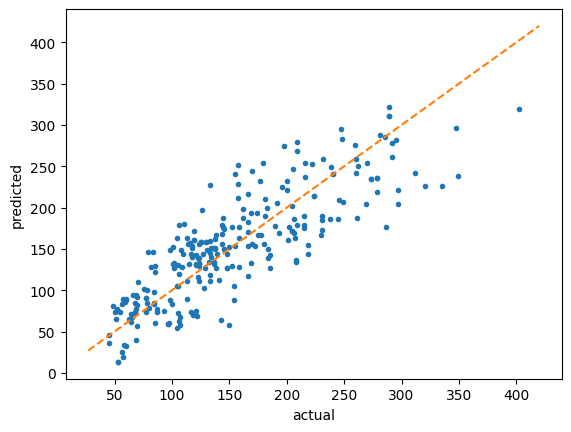

In [30]:
plt.plot(valid_y, car_lm_pred, '.')
plt.xlabel('actual')  # set x-axis label
plt.ylabel('predicted')  # set y-axis label
axes = plt.gca()
plt.plot(axes.get_xlim(), axes.get_xlim(), '--')
plt.show()

1.0


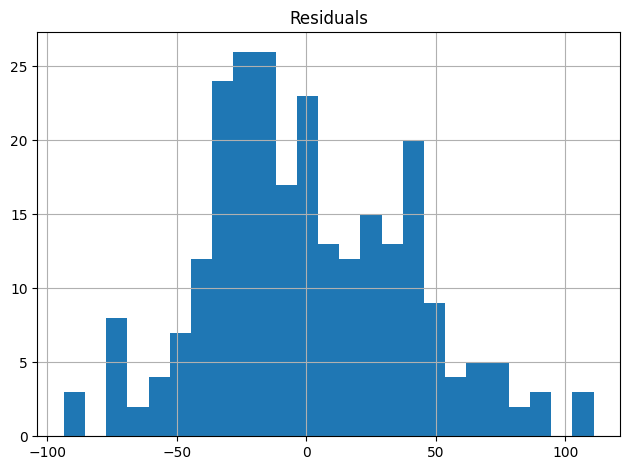

In [31]:
car_lm_pred = car_lm.predict(valid_X)
all_residuals = valid_y - car_lm_pred

# Determine the percentage of datapoints with a residual in [-1406, 1406] = approx. 75\%
print(len(all_residuals[(all_residuals > -1406) & (all_residuals < 1406)]) / len(all_residuals))

ax = pd.DataFrame({'Residuals': all_residuals}).hist(bins=25)

plt.tight_layout()
plt.show()

In [32]:
# run a linear regression of Price on the remaining 11 predictors in the training set
train_df = train_X.join(train_y)

predictors = train_X.columns
formula = 'FARE ~ ' + ' + '.join(predictors)

car_lm = sm.ols(formula=formula, data=train_df).fit()
print(car_lm.summary())

                            OLS Regression Results                            
Dep. Variable:                   FARE   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     192.7
Date:                Thu, 06 Apr 2023   Prob (F-statistic):          2.80e-111
Time:                        09:07:29   Log-Likelihood:                -1940.8
No. Observations:                 382   AIC:                             3896.
Df Residuals:                     375   BIC:                             3923.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      115.5833     14.697      7.865   